# Tutorial: Mouse cortex single-cell callingcards data. 

 This is a brd4 single-cell(sc) callingcards dataset in mouse cortex from [Moudgil et al., Cell. (2020)](https://doi.org/10.1016/j.cell.2020.06.037) and it can be downloaded from [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE148448).
 
 In this tutorial, we will call peaks, make annotation, do differential peak analysis, and pair peaks with genes. In this dataset, there are 111382 insertions and 35950 cells in total. However, many cells are filtered in scRNA-seq analysis. It uses Mudata for calling cards and RNA data. If you want to use Anndata only, please check [Github](https://nbviewer.org/github/The-Mitra-Lab/pycallingcards_data/blob/main/Mouse_cortex_Example_adata.ipynb)

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc
from mudata import MuData

We start by reading qbed data. In this data, one row is one insertion and the columns indicate the chromosome, start point and end point, reads number, the direction, and cell borcode of each insertion. For example, the first row means one insertion is on Chromosome 1, and starts from 3112541 and ends on 3112545. The reads number is 12 with the direction going from 3' to 5'. The barcode of the cell is GATGAAAAGAGTTGGC-1. Note that the barcodes of cells should be consistent with scRNA-seq data.

Use ```cc.rd.read_qbed(filename)``` to read your own qbed data.

In [2]:
qbed_data = cc.datasets.mousecortex_data(data="qbed")
qbed_data 

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,3112541,3112545,12,+,GATGAAAAGAGTTGGC-1
1,chr1,3121337,3121341,6,-,CGATCGGCACATTTCT-1
2,chr1,3199281,3199285,7,+,GTCCTCATCTCCGGTT-1
3,chr1,3211433,3211437,22,-,CGAGAAGAGGAATCGC-1
4,chr1,3245859,3245863,149,+,TTTACTGCATCCGCGA-1
...,...,...,...,...,...,...
111377,chrY,90807968,90807972,200,-,ACGGAGAGTCGCATAT-1
111378,chrY,90833531,90833535,51,-,TAGCCGGTCCTGTACC-1
111379,chrY,90833600,90833604,13,-,TTGGCAAAGAATTGTG-1
111380,chrY,90840262,90840266,8,-,GTGCATAGTACCAGTT-1


Because insertions are discrete, we now need to call peaks to deduce potential binding sites. Three different methods (*CCcaller, cc_tools, Blockify*) are available along with three different species (*hg38, mm10, sacCer3*). 

In this setting, we use ***CCcaller*** in *mouse*('mm10') data. *maxbetween* is the most important parameter for *CCcaller*. It controls the maximum distance between two nearby insertions, or, in another words, the minimum distance between two peaks. 800-2500 is a good parameter for *maxbetween*.  *pvalue_cutoff* is also an important parameter, and a number below 0.05 is strongly advised.

In [3]:
peak_data = cc.pp.call_peaks(qbed_data, method = "CCcaller", reference = "mm10",  maxbetween = 2000, pvalue_cutoff = 0.01,
                  lam_win_size = 1000000,  pseudocounts = 1, record = True, save = 'mouse_cortex.bed')
peak_data

For the CCcaller method without background, [expdata, reference, pvalue_cutoff, fdr_cutoff, lam_win_size, pseudocounts, minlen, extend, maxbetween, test_method, min_insertions, record] would be utilized.


100%|██████████| 21/21 [00:20<00:00,  1.02it/s]


,Chr,Start,End,Experiment Insertions,Reference Insertions,Expected Insertions,pvalue,pvalue_adj
0,chr1,4806673,4809049,12,20,1.120541,2.498336e-10,6.563055e-07
1,chr1,14302176,14310895,14,92,1.523252,1.015569e-10,2.845105e-07
2,chr1,15287495,15288141,8,4,1.029800,1.427167e-06,2.002598e-03
3,chr1,18307949,18310271,8,31,1.151983,3.511291e-06,4.395841e-03
4,chr1,18976012,18982286,13,62,1.452142,5.507813e-10,1.357847e-06
...,...,...,...,...,...,...,...,...
897,chrX,165325630,165327490,8,17,1.047701,1.640240e-06,2.254207e-03
898,chrX,166241178,166243587,8,18,1.257844,7.050309e-06,8.151358e-03
899,chrX,166345453,166350005,11,35,1.507674,7.204418e-08,1.263100e-04
900,chrX,168117814,168120255,7,21,1.162110,2.957329e-05,2.872107e-02



In order to choose suitable a method and parameters for peak calling, please take a look at the genome areas. We stongly advise to adjust the parameters for ```cc.pp.callpeaks()``` to call better peaks.

In this plot, the top section is insertions and their read counts. One dot is an insertion and the height is log(reads+1). The middle section is the distribution of insertions. The bottom section represents the reference genes and peaks. 

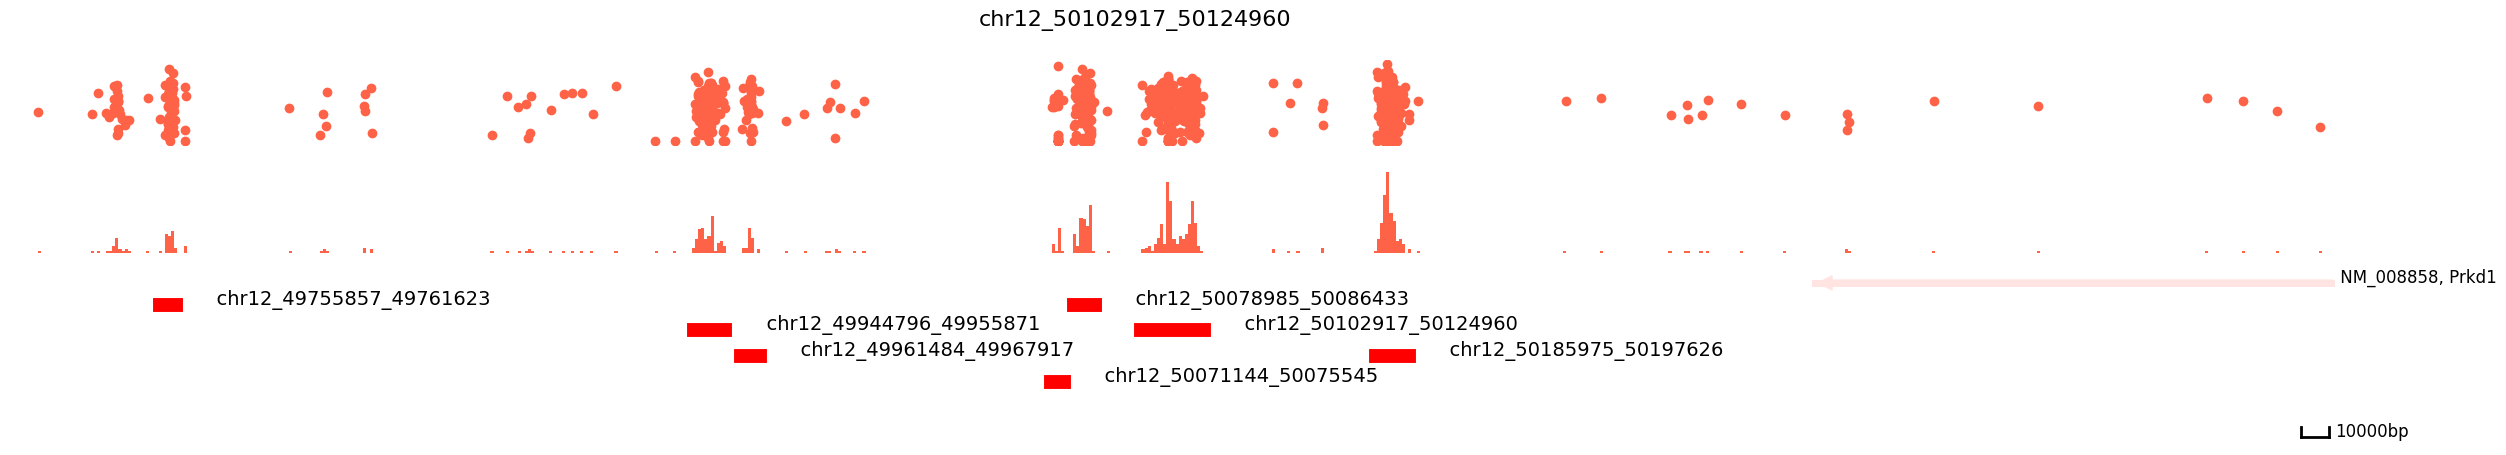

In [4]:
cc.pl.draw_area("chr12",50102917,50124960,400000,peak_data,qbed_data,"mm10",
                figsize = (30,5),peak_line = 4,save = True, title = "chr12_50102917_50124960")

We could also visualize our data in [WashU Epigenome Browser](http://epigenomegateway.wustl.edu/browser/) directly. 
Notice that this link only is valid for 24hrs, so please rerun it if you want to use it.

In [5]:
qbed = {"qbed_data": qbed_data}
bed = {"peak":peak_data}
cc.pl.WashU_browser_url(qbed = qbed,bed = bed,genome = 'mm10')

All qbed addressed
All bed addressed
Uploading files
Please click the following link to see the data on WashU Epigenome Browser directly.
https://epigenomegateway.wustl.edu/browser/?genome=mm10&hub=https://companion.epigenomegateway.org//task/69a9041e007c90f0fc6f5fe4b4699481/output//datahub.json


We advise to look at the whole chromosome and see the distribution of peaks to make sure everything is going accordingly.

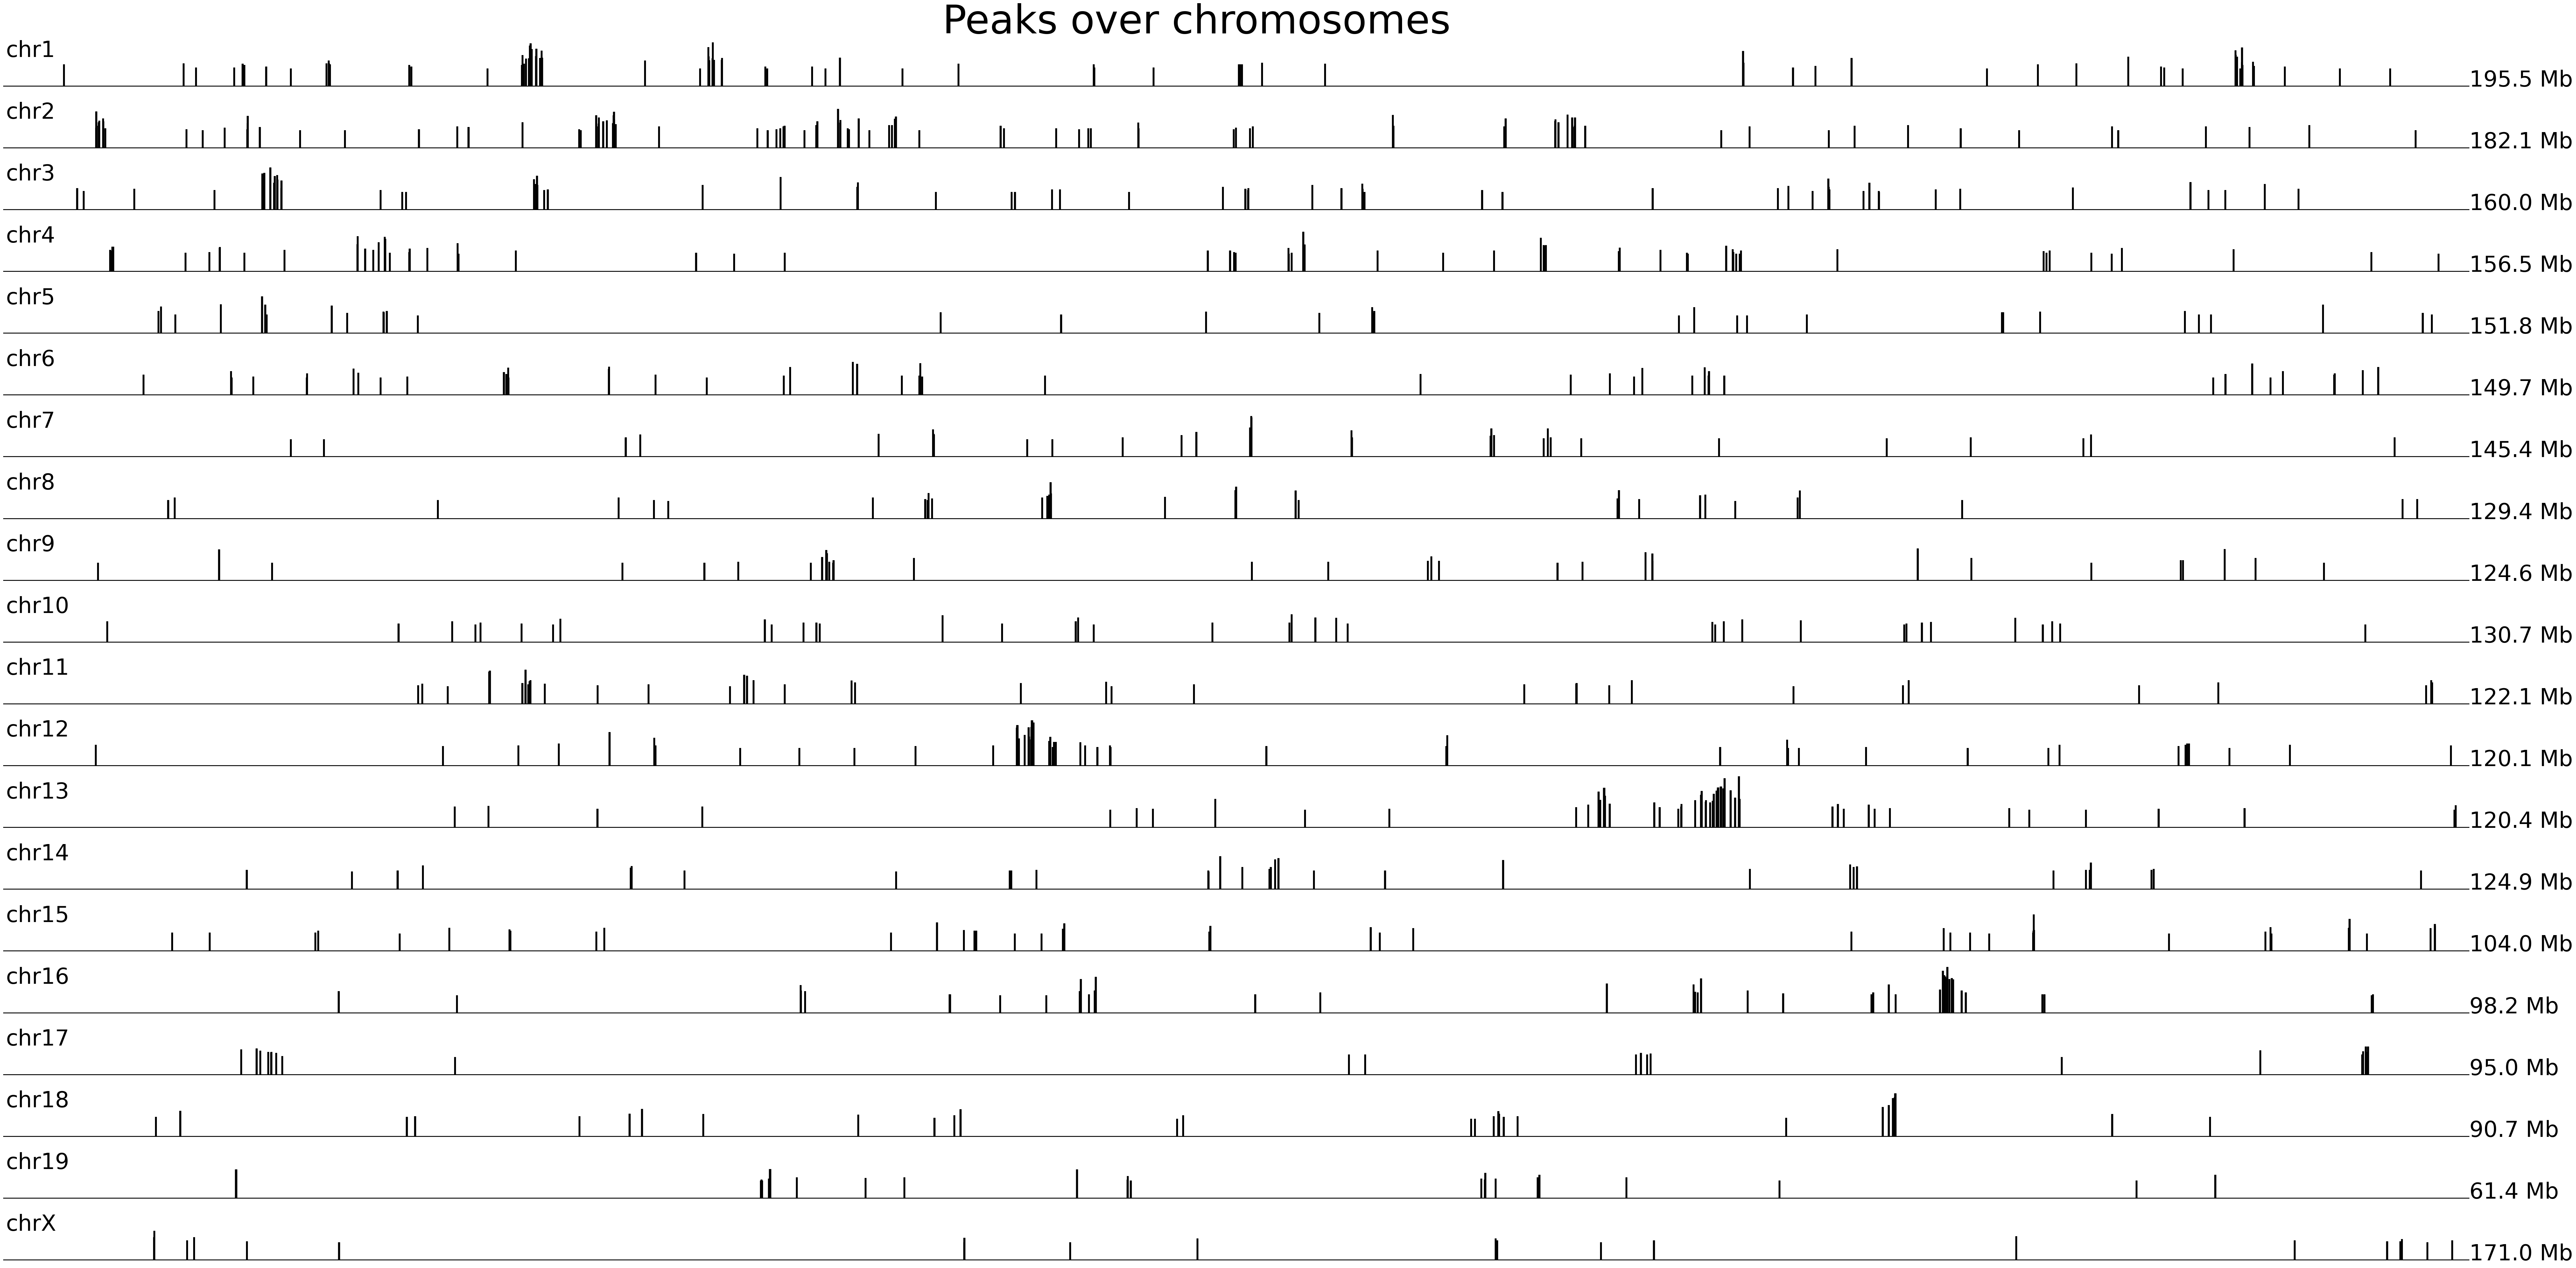

In [6]:
cc.pl.whole_peaks(peak_data, reference = "mm10")

In the next step, we annotate the peaks by their closest genes using [bedtools](https://bedtools.readthedocs.io/en/latest/) and [pybedtools](https://daler.github.io/pybedtools/).
Make sure they are all previously installed before using.

In [7]:
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10")
peak_annotation = cc.pp.combine_annotation(peak_data,peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Experiment Insertions,Reference Insertions,Expected Insertions,pvalue,pvalue_adj,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,4806673,4809049,12,20,1.120541,2.498336e-10,6.563055e-07,NM_008866,Lypla1,NR_033530,Mrpl15
1,chr1,14302176,14310895,14,92,1.523252,1.015569e-10,2.845105e-07,NM_010164,Eya1,NM_010827,Msc
2,chr1,15287495,15288141,8,4,1.029800,1.427167e-06,2.002598e-03,NM_001098528,Kcnb2,NM_177781,Trpa1
3,chr1,18307949,18310271,8,31,1.151983,3.511291e-06,4.395841e-03,NM_183124,Defb41,NM_001039123,Defb18
4,chr1,18976012,18982286,13,62,1.452142,5.507813e-10,1.357847e-06,NM_153154,Tfap2d,NM_001286340,Tfap2b
...,...,...,...,...,...,...,...,...,...,...,...,...
897,chrX,165325630,165327490,8,17,1.047701,1.640240e-06,2.254207e-03,NM_183427,Glra2,NM_175027,Fancb
898,chrX,166241178,166243587,8,18,1.257844,7.050309e-06,8.151358e-03,NM_023122,Gpm6b,NM_001310724,Gemin8
899,chrX,166345453,166350005,11,35,1.507674,7.204418e-08,1.263100e-04,NM_023122,Gpm6b,NM_177429,Ofd1
900,chrX,168117814,168120255,7,21,1.162110,2.957329e-05,2.872107e-02,NM_001290427,Frmpd4,NM_001290428,Frmpd4


Then, we read the barcode file.

In [8]:
barcodes = cc.datasets.mousecortex_data(data="barcodes")
barcodes

,index
0,AAACCTGAGAACTCGG-1
1,AAACCTGAGCAATCTC-1
2,AAACCTGAGCCGTCGT-1
3,AAACCTGAGTAGCGGT-1
4,AAACCTGAGTGGAGTC-1
...,...
35945,TTTGTCAAGTCCCACG-1
35946,TTTGTCACAGCGTCCA-1
35947,TTTGTCACATTTCACT-1
35948,TTTGTCAGTCGCATCG-1


Use qbed data, peak data and barcode data to make a cell by peak [Anndata](https://anndata.readthedocs.io/en/latest/) object.

In [9]:
adata_cc = cc.pp.make_Anndata(qbed_data, peak_annotation, barcodes)
adata_cc

100%|██████████| 20/20 [00:00<00:00, 76.30it/s]


AnnData object with n_obs × n_vars = 35950 × 902
    var: 'Chr', 'Start', 'End', 'Experiment Insertions', 'Reference Insertions', 'Expected Insertions', 'pvalue', 'pvalue_adj', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Calling cards data is sequenced along with RNA-seq data. For the following steps, we are going to read scRNA-seq data and analyze them together. [Scanpy](https://scanpy.readthedocs.io/en/stable/) is recommended to load and analyze scRNA-seq data.

In [10]:
adata = cc.datasets.mousecortex_data(data="RNA")
adata

AnnData object with n_obs × n_vars = 30300 × 2638
    obs: 'batch', 'n_genes', 'total_counts', 'cluster'
    var: 'n_counts', 'n_cells', 'highly_variable'

In the scRNA-seq analysis, many cells are filtered out because of low quality. We need to make the cells in qbed anndata to be the exactly same as RNA-seq anndata.

In [11]:
adata_cc = cc.pp.filter_adata_sc(adata_cc,adata)
adata_cc

View of AnnData object with n_obs × n_vars = 30300 × 902
    var: 'Chr', 'Start', 'End', 'Experiment Insertions', 'Reference Insertions', 'Expected Insertions', 'pvalue', 'pvalue_adj', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

In [12]:
mdata = MuData({"RNA": adata, "CC": adata_cc})
mdata

/opt/apps/labs/rmlab/software/juanru/miniconda/lib/python3.9/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/opt/apps/labs/rmlab/software/juanru/miniconda/lib/python3.9/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


MuData object with n_obs × n_vars = 30300 × 3540
  2 modalities
    RNA:	30300 x 2638
      obs:	'batch', 'n_genes', 'total_counts', 'cluster'
      var:	'n_counts', 'n_cells', 'highly_variable'
    CC:	30300 x 902
      var:	'Chr', 'Start', 'End', 'Experiment Insertions', 'Reference Insertions', 'Expected Insertions', 'pvalue', 'pvalue_adj', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Many results for RNA can be used in calling cards analysis. Here, we borrow clustering information from scRNA-seq data.

Although one peak should have many insertions, but there is a chance that all the cells from the peak were filtered by the RNA preprocesssing. In this case, we advise to filter peaks by the minimum number of cells. 

In [13]:
cc.pp.filter_peaks(mdata["CC"], min_counts=1)

/opt/apps/labs/rmlab/software/juanru/miniconda/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number


Differential peak analysis shows significant bindings for each cluster. In this example, we use *binomial test* to find out.

In [14]:
cc.tl.rank_peak_groups_mu(mdata, "RNA:cluster",method = 'binomtest',key_added = 'binomtest')
mdata

100%|██████████| 18/18 [00:34<00:00,  1.92s/it]


MuData object with n_obs × n_vars = 30300 × 3540
  2 modalities
    RNA:	30300 x 2638
      obs:	'batch', 'n_genes', 'total_counts', 'cluster'
      var:	'n_counts', 'n_cells', 'highly_variable'
    CC:	30300 x 902
      var:	'Chr', 'Start', 'End', 'Experiment Insertions', 'Reference Insertions', 'Expected Insertions', 'pvalue', 'pvalue_adj', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2', 'n_counts'
      uns:	'binomtest'

Plot the results for differential peak analysis.

Currently, the peaks are ranked by pvalues. It could also be ranked by logfoldchanges by the following code:

```python
cc.tl.rank_peak_groups_mu(mdata, "RNA:cluster",method = 'binomtest',rankby = 'logfoldchanges')
cc.pl.rank_peak_groups(mdata["CC"], key = 'binomtest',rankby = 'logfoldchanges')

```

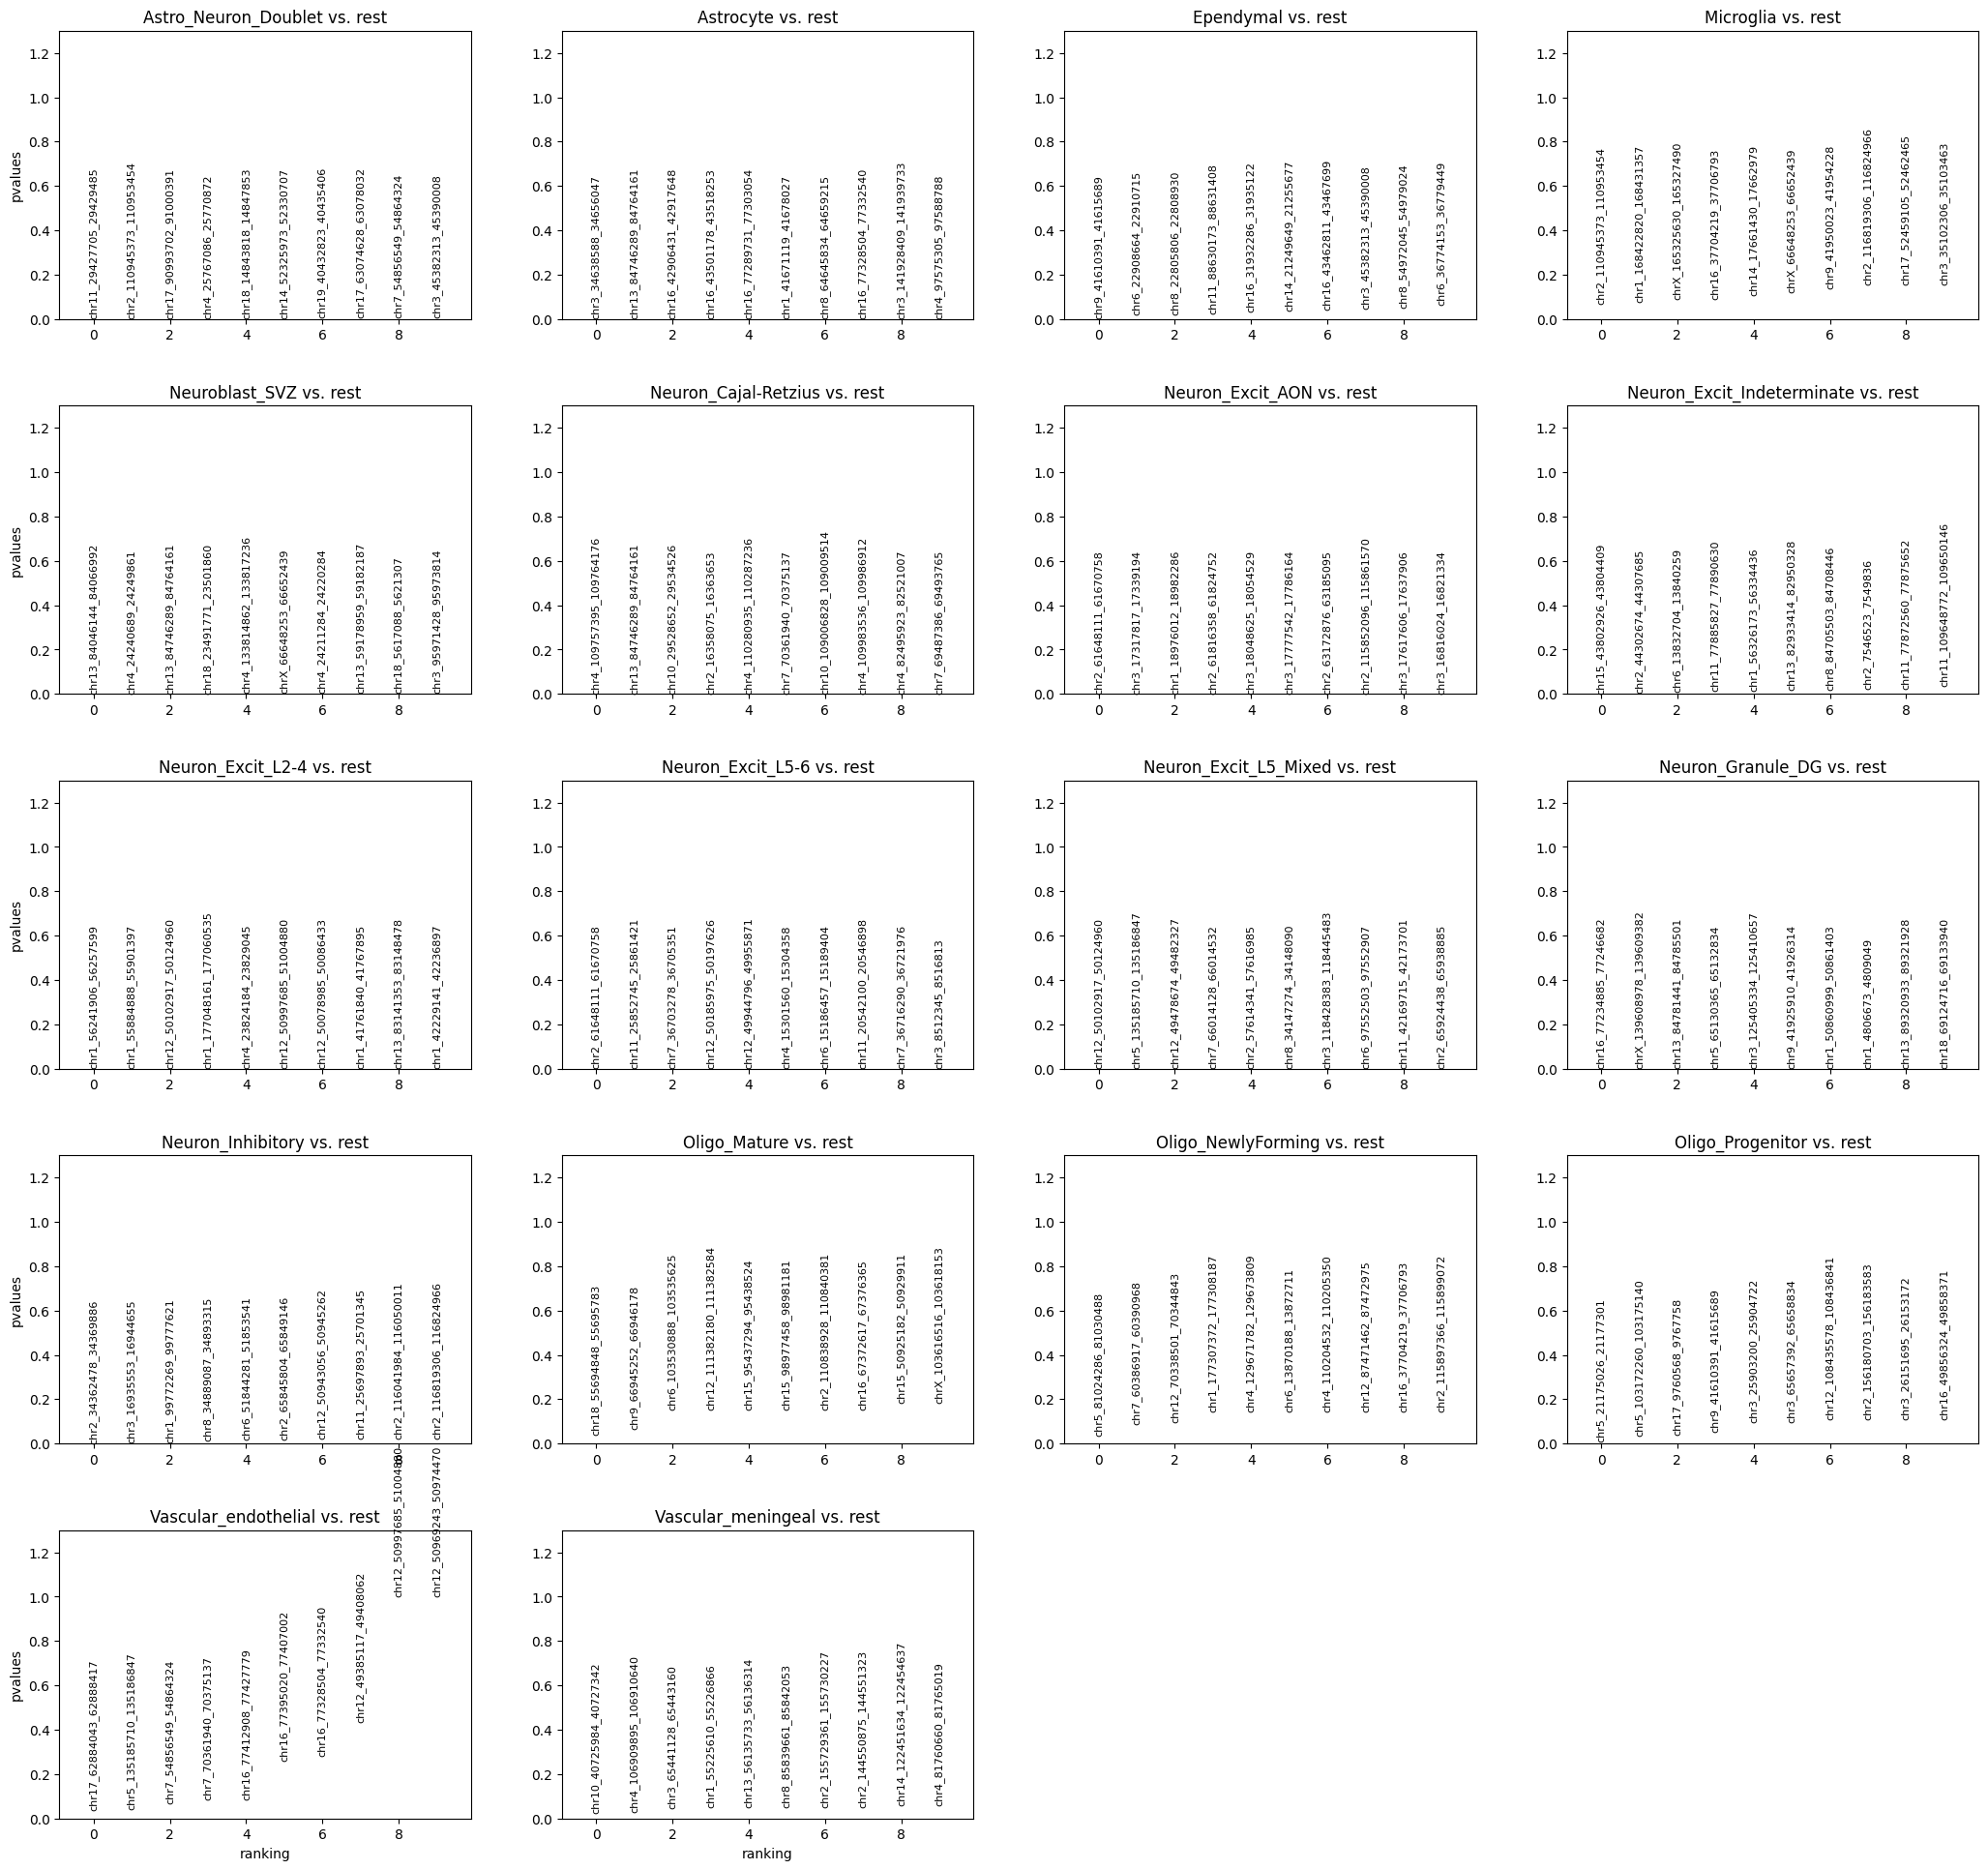

In [15]:
cc.pl.rank_peak_groups(mdata["CC"], key = 'binomtest', save = True)

Then, we take a look at the genome for the highly differentiated peaks. The colored ones are the insertions for a specific cluster and the grey ones are the total insertions for the whole dataset. We can see that most of the insertions are from Astrocyte in the following peaks.

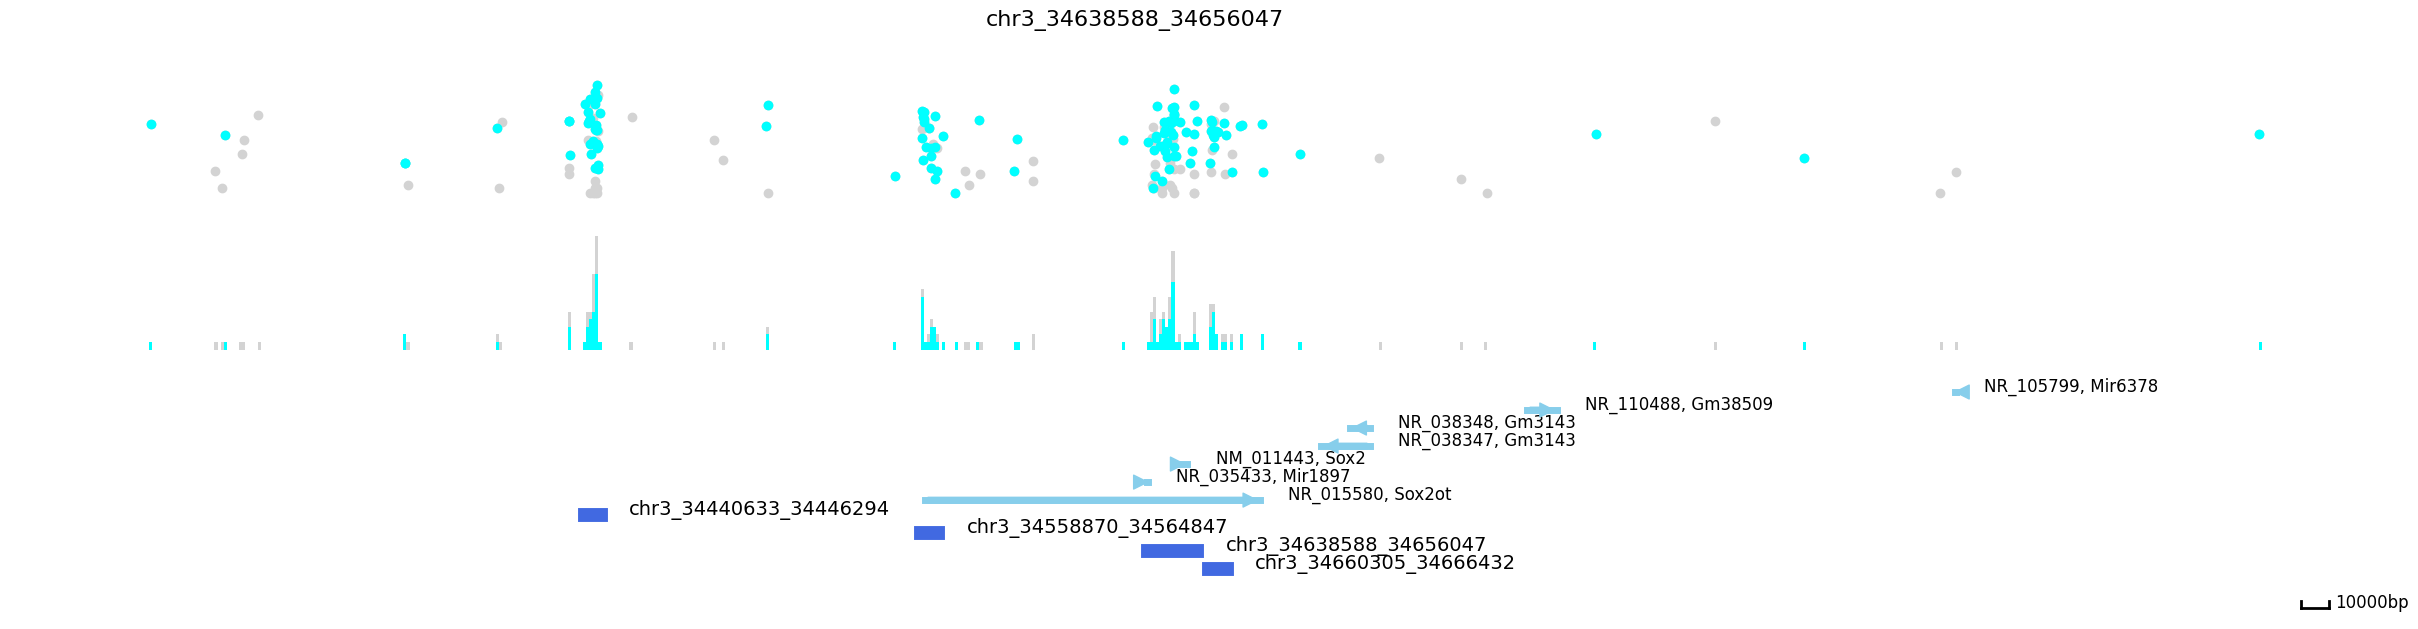

In [16]:
cc.pl.draw_area_mu("chr3",34638588,34656047,400000,peak_data,qbed_data,"mm10",mdata = mdata,
                name = 'Astrocyte',key ='RNA:cluster',figsize = (30,7),peak_line = 4,color = "blue", title = "chr3_34638588_34656047")

If the peak and the related reference genes are also differential, then we can see whether there is a relationship between the binding and gene expression.

Let's do the differential expression analysis for scRNA-seq data.

In [17]:
sc.tl.rank_genes_groups(mdata["RNA"],'cluster')

Find out the co-differential peak-gene pairs. Look into all the differential peaks in each cluster and then see if the annotated genes are significantly expressed in the cluster. We can set the pvalue and score/log foldchange cutoff easily.


In [18]:
cc.tl.pair_peak_gene_sc_mu(mdata, pvalue_adj_cutoff_cc = 0.05, pvalue_adj_cutoff_rna = 0.05, lfc_cutoff = 3, score_cutoff = 3)
mdata["CC"].uns['pair']

,Cluster,Peak,Logfoldchanges,Pvalue_peak,Pvalue_adj_peak,Gene,Score_gene,Pvalue_gene,Pvalue_adj_gene
0,Astrocyte,chr16_43501178_43518253,3.077262,1.462410e-16,3.297735e-14,Zbtb20,79.234276,0.000000e+00,0.000000e+00
1,Astrocyte,chr8_64645834_64659215,4.623955,3.114365e-14,3.794710e-12,Msmo1,61.964111,0.000000e+00,0.000000e+00
2,Astrocyte,chr3_141928409_141939733,4.876938,3.786296e-14,3.794710e-12,Bmpr1b,24.131538,2.475603e-121,1.659753e-120
3,Astrocyte,chr4_97575305_97588788,3.099679,5.907086e-14,5.328192e-12,E130114P18Rik,16.893749,3.380841e-62,1.514206e-61
4,Astrocyte,chr4_97575305_97588788,3.099679,5.907086e-14,5.328192e-12,Nfia,45.417362,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
76,Neuron_Excit_L2-4,chr13_83141353_83148478,3.495487,3.141216e-06,3.148197e-04,Mef2c,182.292236,0.000000e+00,0.000000e+00
77,Neuron_Excit_L5_Mixed,chr7_66014128_66014532,3.737143,2.786909e-04,3.677499e-02,Pcsk6,-16.587570,2.263189e-61,3.313281e-60
78,Neuron_Granule_DG,chr3_125405334_125410657,5.806064,1.011677e-04,1.380304e-02,Ndst4,4.497158,8.449939e-06,3.032315e-05
79,Neuron_Granule_DG,chr3_125405334_125410657,5.806064,1.011677e-04,1.380304e-02,Ugt8a,-23.040115,5.201659e-89,3.379286e-87


Draw the results above to find out the potential relationship between TF bindings and gene expression.

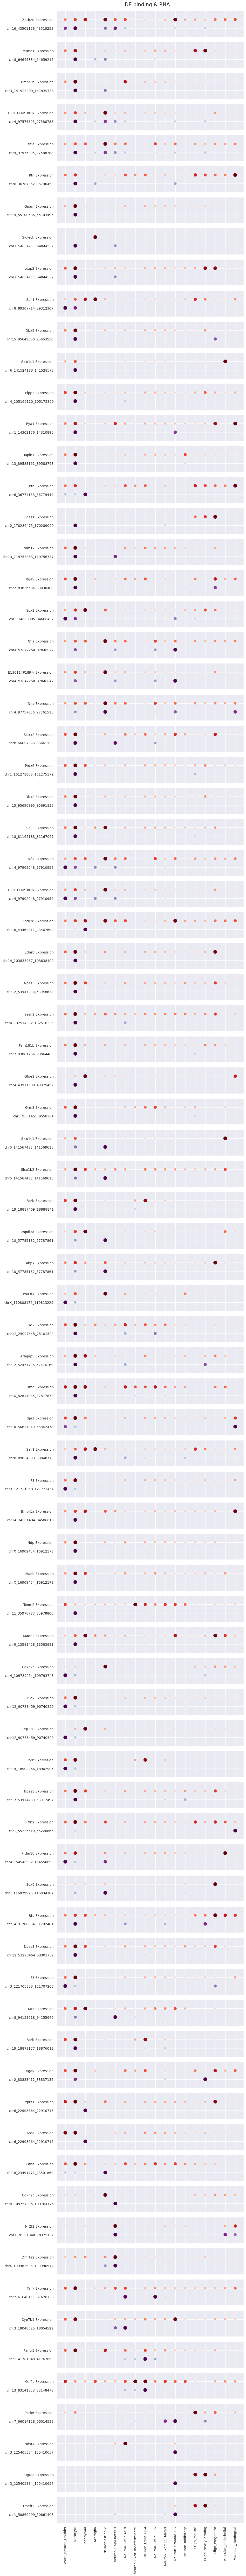

In [19]:
cc.pl.dotplot_sc_mu(mdata)

After seeing the dotplot above, bring some peaks to the RNA Anndata object and see the distribution in the UMAP plot.

In [20]:
sc.pp.pca(mdata["RNA"])
sc.pp.neighbors(mdata["RNA"])
sc.tl.umap(mdata["RNA"])

The first plot is the average insertions of the peak in each cluster, the second plot is the gene expression Gou3f2 (one of its nearest genes for the peak); the third plot is the cluster information.

/opt/apps/labs/rmlab/software/juanru/miniconda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


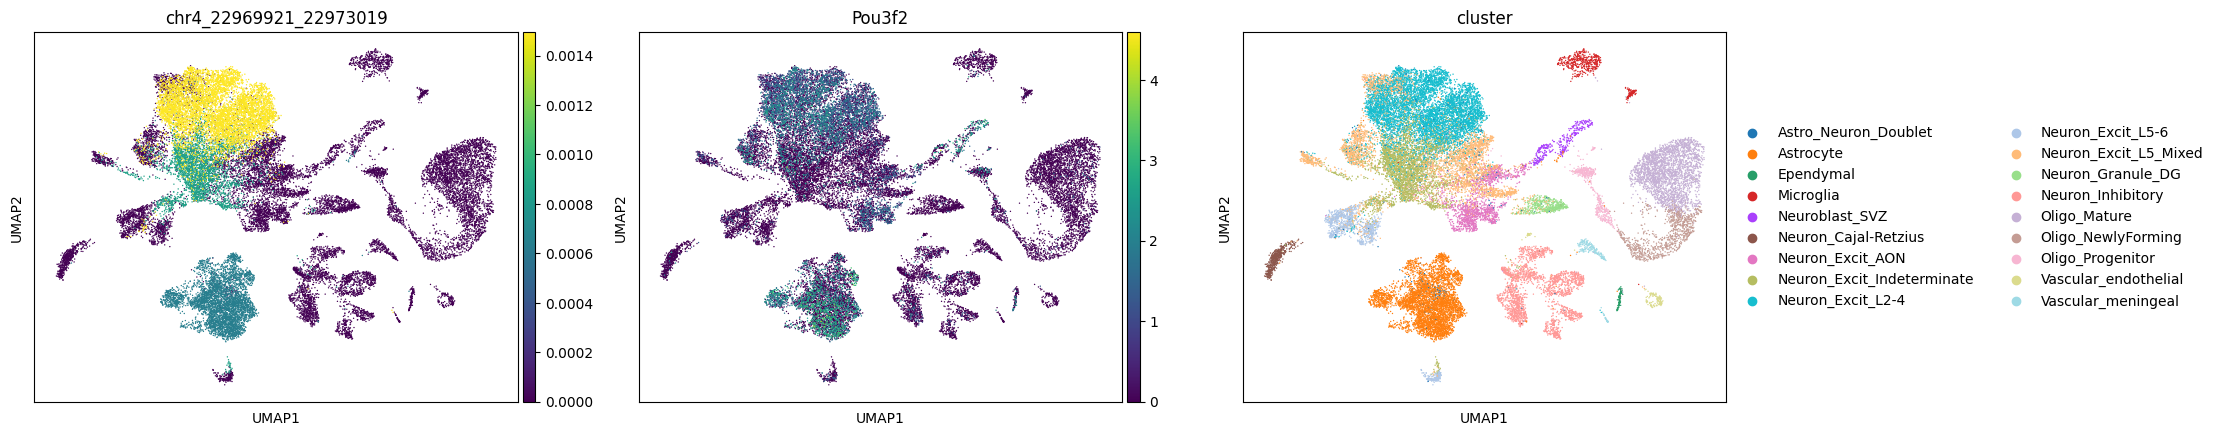

In [21]:
cc.pl.plot_matched(mdata,'chr4_22969921_22973019','Pou3f2')

/opt/apps/labs/rmlab/software/juanru/miniconda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


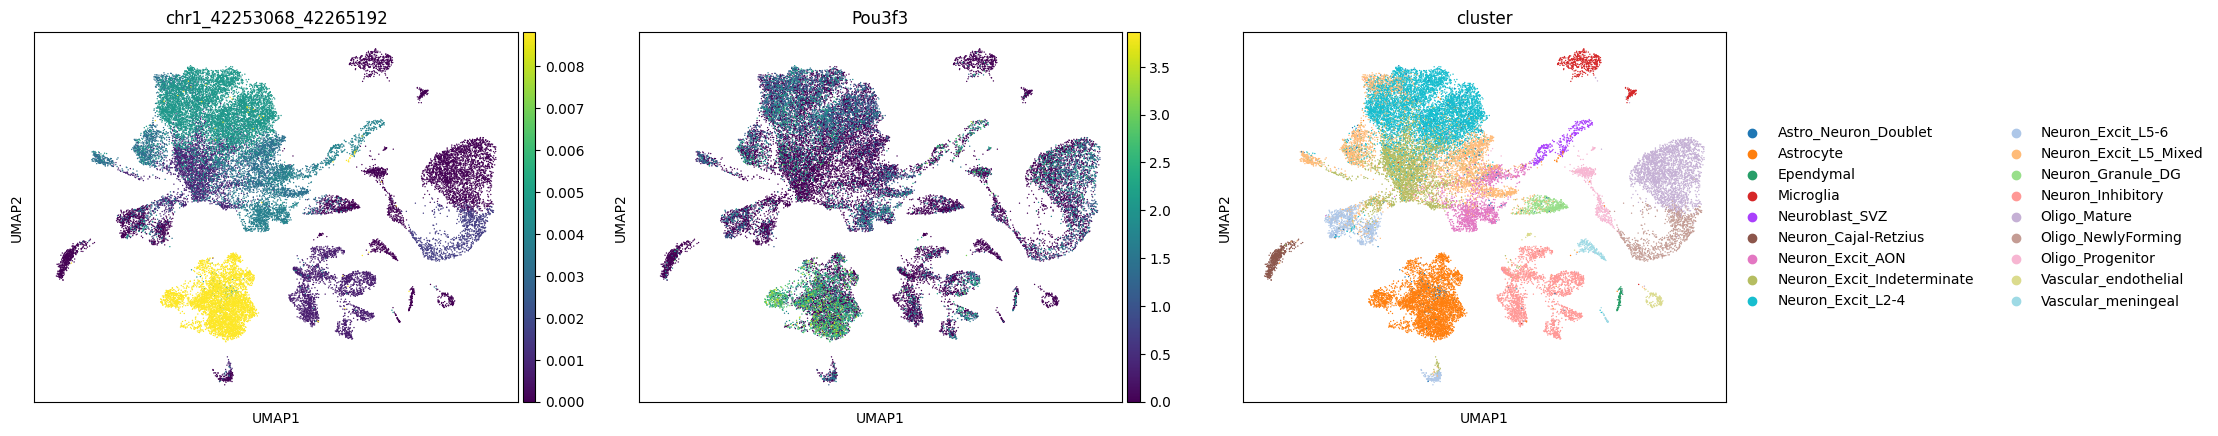

In [22]:
cc.pl.plot_matched(mdata,'chr1_42253068_42265192','Pou3f3')

We can see the potential relationship between bindings and gene expression.

Now, we can make hypotheses in mouse. However, we could try to map the binding sites and genes to the human genome. We use [liftover](https://genome.ucsc.edu/cgi-bin/hgLiftOver) to get the resuls.

In [23]:
mdata["CC"].uns["pair"] = cc.tl.result_mapping(mdata["CC"].uns["pair"])
mdata["CC"].uns["pair"]

Start mapping the peaks to the new genome.


100%|██████████| 81/81 [00:00<00:00, 242.37it/s]


Start finding location of genes in the new genome.


100%|██████████| 81/81 [00:00<00:00, 230.96it/s]


,Cluster,Peak,Logfoldchanges,Pvalue_peak,Pvalue_adj_peak,Gene,Score_gene,Pvalue_gene,Pvalue_adj_gene,Chr_liftover,Start_liftover,End_liftover,Chr_hg38,Start_hg38,End_hg38
0,Astrocyte,chr16_43501178_43518253,3.077262,1.462410e-16,3.297735e-14,Zbtb20,79.234276,0.000000e+00,0.000000e+00,chr3,114439800,114457200,chr3,114314499,115147280
1,Astrocyte,chr8_64645834_64659215,4.623955,3.114365e-14,3.794710e-12,Msmo1,61.964111,0.000000e+00,0.000000e+00,chr4,165418445,165438029,chr4,165327665,165343162
2,Astrocyte,chr3_141928409_141939733,4.876938,3.786296e-14,3.794710e-12,Bmpr1b,24.131538,2.475603e-121,1.659753e-120,chr4,95040417,95054959,chr4,94757976,95158450
3,Astrocyte,chr4_97575305_97588788,3.099679,5.907086e-14,5.328192e-12,E130114P18Rik,16.893749,3.380841e-62,1.514206e-61,chr1,60858298,60872361,,,
4,Astrocyte,chr4_97575305_97588788,3.099679,5.907086e-14,5.328192e-12,Nfia,45.417362,0.000000e+00,0.000000e+00,chr1,60858298,60872361,chr1,61077273,61462788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Neuron_Excit_L2-4,chr13_83141353_83148478,3.495487,3.141216e-06,3.148197e-04,Mef2c,182.292236,0.000000e+00,0.000000e+00,chr5,89235156,89249323,chr5,88718240,88904105
77,Neuron_Excit_L5_Mixed,chr7_66014128_66014532,3.737143,2.786909e-04,3.677499e-02,Pcsk6,-16.587570,2.263189e-61,3.313281e-60,chr15,101337048,101337565,chr15,101303927,101489984
78,Neuron_Granule_DG,chr3_125405334_125410657,5.806064,1.011677e-04,1.380304e-02,Ndst4,4.497158,8.449939e-06,3.032315e-05,chr4,115106106,115112630,chr4,114827772,115113876
79,Neuron_Granule_DG,chr3_125405334_125410657,5.806064,1.011677e-04,1.380304e-02,Ugt8a,-23.040115,5.201659e-89,3.379286e-87,chr4,115106106,115112630,,,


We search the [GWAS Catalog database](https://www.ebi.ac.uk/gwas/docs/file-downloads) and find out related SNPs in the binding areas.

In [24]:
mdata["CC"].uns["pair"] = cc.tl.GWAS(mdata["CC"].uns["pair"])
mdata["CC"].uns["pair"]

,Cluster,Peak,Logfoldchanges,Pvalue_peak,Pvalue_adj_peak,Gene,Score_gene,Pvalue_gene,Pvalue_adj_gene,Chr_liftover,Start_liftover,End_liftover,Chr_hg38,Start_hg38,End_hg38,GWAS
0,Astrocyte,chr16_43501178_43518253,3.077262,1.462410e-16,3.297735e-14,Zbtb20,79.234276,0.000000e+00,0.000000e+00,chr3,114439800,114457200,chr3,114314499,115147280,Schizophrenia; Smoking status (ever vs never s...
1,Astrocyte,chr8_64645834_64659215,4.623955,3.114365e-14,3.794710e-12,Msmo1,61.964111,0.000000e+00,0.000000e+00,chr4,165418445,165438029,chr4,165327665,165343162,Atopic dermatitis (moderate to severe)
2,Astrocyte,chr3_141928409_141939733,4.876938,3.786296e-14,3.794710e-12,Bmpr1b,24.131538,2.475603e-121,1.659753e-120,chr4,95040417,95054959,chr4,94757976,95158450,
3,Astrocyte,chr4_97575305_97588788,3.099679,5.907086e-14,5.328192e-12,E130114P18Rik,16.893749,3.380841e-62,1.514206e-61,chr1,60858298,60872361,,,,Refractive error
4,Astrocyte,chr4_97575305_97588788,3.099679,5.907086e-14,5.328192e-12,Nfia,45.417362,0.000000e+00,0.000000e+00,chr1,60858298,60872361,chr1,61077273,61462788,Refractive error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Neuron_Excit_L2-4,chr13_83141353_83148478,3.495487,3.141216e-06,3.148197e-04,Mef2c,182.292236,0.000000e+00,0.000000e+00,chr5,89235156,89249323,chr5,88718240,88904105,Macular thickness; Waist circumference adjuste...
77,Neuron_Excit_L5_Mixed,chr7_66014128_66014532,3.737143,2.786909e-04,3.677499e-02,Pcsk6,-16.587570,2.263189e-61,3.313281e-60,chr15,101337048,101337565,chr15,101303927,101489984,
78,Neuron_Granule_DG,chr3_125405334_125410657,5.806064,1.011677e-04,1.380304e-02,Ndst4,4.497158,8.449939e-06,3.032315e-05,chr4,115106106,115112630,chr4,114827772,115113876,
79,Neuron_Granule_DG,chr3_125405334_125410657,5.806064,1.011677e-04,1.380304e-02,Ugt8a,-23.040115,5.201659e-89,3.379286e-87,chr4,115106106,115112630,,,,


Save the file if needed.

In [25]:
mdata.write("Mouse-Cortex.h5mu")

/opt/apps/labs/rmlab/software/juanru/miniconda/lib/python3.9/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
